# 02_Book_Production

**Content:**
1) Download images from the internet
2) Prepare a dataset
3) Try different types of cropping (data augmentation)
4) Fine-tune the model
5) Check results in the confusion matrix
6) Sort images by their loss and clean the dataset using fastai widget
7) Save the model
8) Create a model app in Notebook

**Comment:**  
- ??fn = doc(fn)
  
This info was in 03_lecture:  
- Kaggle ML competition
- Code on how to implement SGD, sigmoid, relu in fastai & PyTorch (https://colab.research.google.com/github/fastai/fastbook/blob/master/04_mnist_basics.ipynb#scrollTo=gOoPV6YZwZGo)
- Always create two files: train and app  
  Train: dataset, train model, learn.export(‘model.pkl’)  
  App: everything else after this  
- How to choose a built-in model:  
  import timm  
  PyTorch built-in models:  
  timm.list_models(‘name’)  
  (e..g, name = convnext*)  
  And then:  
  learn = vision_learner(dls, ’model_name’, metrics=…).to_fp16()  
  learn.fine_tune(3)  
- How to get info about the pre-trained model:  
  whole model:  
  m = learn.model  
  get particular component:  
  l = m.get_submodule(‘0.model.stem.1’)  
  list(l.parameters())  

## Import libraries

In [90]:
from ddgs import DDGS  # for images searching on DuckDuckGo
from fastcore.all import *  # for operations with search results (e.g., L for lists)
from fastdownload import download_url  # for downloading files (e.g., image) from URLs and saving them to PC
from fastai.vision.all import *  # for image processing and machine learning (e.g., Image for opening and working with images)
from fastai.vision.widgets import *  # for widgets (e.g., for interactive data cleaning)

# 1. Create a dataset
## 1) Download images from internet

### 1) Define fn for searching on web

In [59]:
# define fn that searches for 200 images based on a keyword and returns a list of image URLs
def search_images(keywords, max_images=150): 
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

___________________
Comment:
- L(...) = L tool from fastcore wraps the search results into a special list-like object
- DDGS() = creates a new DDGS object, like starting the DuckDuckGo search tool
- .images() = calls the images method of DDGS, which searches for images using the provided keywords and number
- .itemgot() = takes the search results (a list of dictionaries) and extracts just the URLs (stored under the key 'image' in each dictionary)
___________________

### 2) Check the code on a single example

1) Get URL:

In [40]:
# get URL for the search using defined fn
urls = search_images('grizzly', max_images=1)
print(urls[0])

https://wallpapers.com/images/file/grizzly-bear-pictures-2560-x-2048-o9hsfvsc9zfdzdu9.jpg


2) Download image from URL:

In [44]:
# create filename for downloaded image
filename = 'grizzly.jpg'
# download image from URL and save it as filename using download_url() fn from fastdownload
download_url(urls[0], filename, show_progress=False)

Path('grizzly.jpg')

3) Open downloaded image:

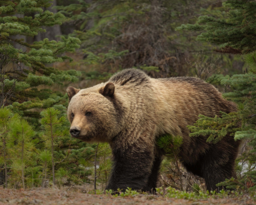

In [45]:
# open the saved image and save as a var using Image.open() fn from fastai.vision
im = Image.open(filename)
# display the image in a resized (smaller) format using to_thumb() fn Image object
im.to_thumb(256,256)

Short code for these three steps:

In [ ]:
# get URL and download image from URL and save it as filename
download_url(search_images('grizzly', max_images=1)[0], 'grizzly.jpg', show_progress=False)
# Display a resized image
Image.open('grizzly.jpg').to_thumb(256,256)

### 3) Download images to PC
1) Perform search and downloading for each entry and sabe results in different folders:

In [61]:
# Create a tuple to loop through the search terms
searches = 'grizzly','black','teddy'
# Create a var: Path object (from pathlib lib included in fastai.vision), which is a folder for storing images
path = Path('bears')

# perform for each search term:
for i in searches:
    dest = (path/i)  # create a var: subfolder inside the main folder, named as a search term
    dest.mkdir(exist_ok=True, parents=True)  # now create it on PC: if already exist - make no error, if not - create then.
    download_images(dest, urls=search_images(f'{i} bear'))  # perform search, get URLs, download images in the subfolder
    resize_images(path/i, max_size=400, dest=path/i)  # resize all images in the subfolder

/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/popen_fork.py:67: DeprecationWarning: This process (pid=36806) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/popen_fork.py:67: DeprecationWarning: This process (pid=36806) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/popen_fork.py:67: DeprecationWarning: This process (pid=36806) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/popen_fork.py:67: DeprecationWarning: This process (pid=36806) is multi-threaded, u

2) Check for the images that can not be opened:

In [68]:
# find the images that can't be opened
failed = verify_images(get_image_files(path))
failed
# delete them 
failed.map(Path.unlink)

/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/popen_fork.py:67: DeprecationWarning: This process (pid=36806) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/popen_fork.py:67: DeprecationWarning: This process (pid=36806) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/popen_fork.py:67: DeprecationWarning: This process (pid=36806) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/popen_fork.py:67: DeprecationWarning: This process (pid=36806) is multi-threaded, u

(#0) []

___________________
Comment:
- get_image_files() = fn from fastai.vision that searches for image files (extensions .jpg, .png) in the folders specified by path, and returns a list of image file paths
- verify_images() = fn from fastai.vision that takes this list and checks if each can be opened by PIL. Returns paths for images that fail to open
- Path.unlink = method of the Path class (from pathlib, included in fastai.vision.all) that deletes a file from the computer.
- failed.map() = A method of the L class (from fastcore) that applies a fn Path.unlink to each item in the list of unreadable images.
___________________

## 2) Create a dataloader

In [70]:
# Create a DataBlock object and give it the path
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  # define input and output blocks
    get_items=get_image_files,  # fn takes a path, and returns a list of all of the images in that path
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # 20% valid_data taking randomly, each time the same.
    get_y=parent_label,  # how to get the label (category) for each image: parent_label fn uses the name of the parent folder (e.g., grizzly, black, or teddy) as the label for each image.
    item_tfms=Resize(128)  # resize images to 128x128 pixels to ensure all are the same size
).dataloaders(path, bs=32)

# "().dataloaders(path, bs=32)" it is the same as making additional line "dls = bears.dataloaders(path)"

Check that images and categories are matched correctly:

/Users/hela/Code/fast_ai/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)
/Users/hela/Code/fast_ai/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)
/Users/hela/Code/fast_ai/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't 

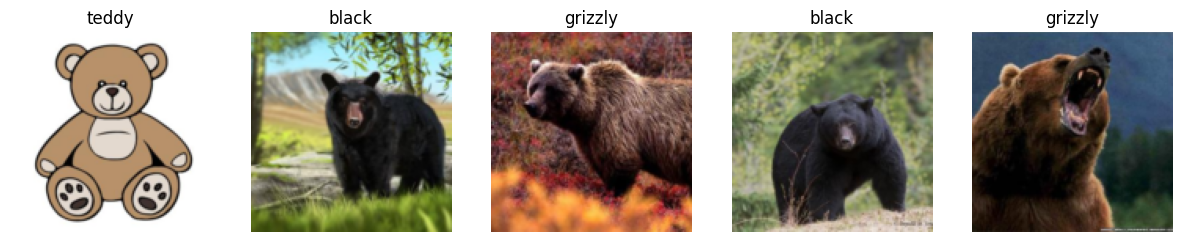

In [75]:
dls.show_batch(max_n=5, nrows=1)

### Try different types of cropping
#### crop the images to fit a square shape
By default Resize **crops the images to fit a square shape** of the size requested, using the full width or height.  
(but if we crop the images then we remove some of the features that allow us to perform recognition.)  
Alternatively, we can...

#### squish/stretch 
(but if we squish or stretch the images they end up as unrealistic shapes, leading to a model that learns that things look different to how they actually are, which we would expect to result in lower accuracy.)

/Users/hela/Code/fast_ai/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)
/Users/hela/Code/fast_ai/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)
/Users/hela/Code/fast_ai/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't 

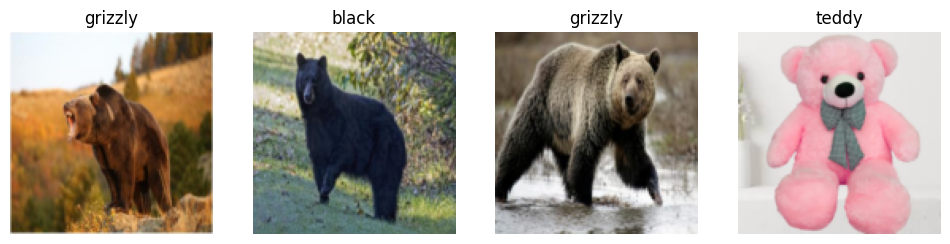

In [76]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

#### pad the images with zeros (black)
(but if we pad the images then we have a whole lot of empty space, which is just wasted computation for our model and results in a lower effective resolution for the part of the image we actually use.)

/Users/hela/Code/fast_ai/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)
/Users/hela/Code/fast_ai/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)
/Users/hela/Code/fast_ai/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't 

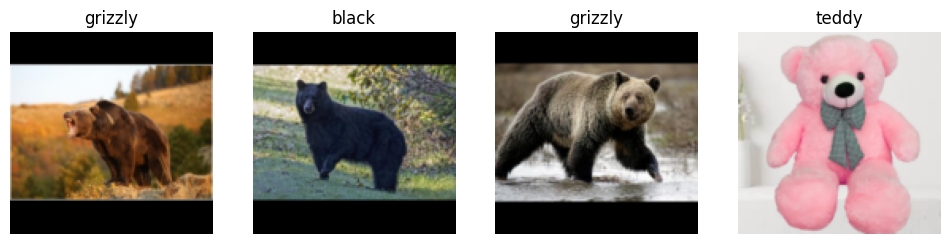

In [77]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

#### randomly select part of the image, and crop to just that part.**  
This is what is done instead!  
On each epoch (which is one complete pass through all of our images in the dataset) we randomly select a different part of each image. This means that our model can learn to focus on, and recognize, different features in our images. It also reflects how images work in the real world: different photos of the same thing may be framed in slightly different ways.

In fact, an entirely untrained neural network knows nothing whatsoever about how images behave. It doesn't even recognize that when an object is rotated by one degree, it still is a picture of the same thing! So actually training the neural network with examples of images where the objects are in slightly different places and slightly different sizes helps it to understand the basic concept of what an object is, and how it can be represented in an image.

The most important parameter to pass in is min_scale, which determines how much of the image to select at minimum each time:

/Users/hela/Code/fast_ai/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)
/Users/hela/Code/fast_ai/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)
/Users/hela/Code/fast_ai/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't 

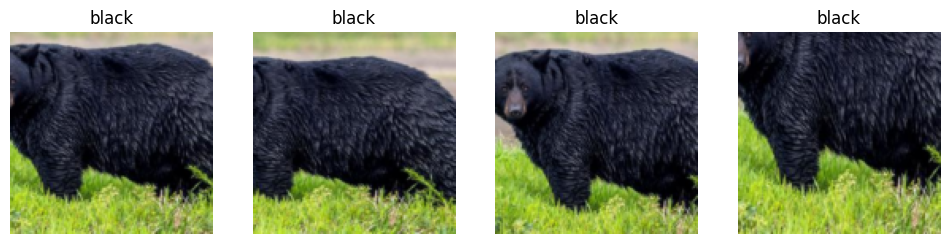

In [78]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

### Data Augmentation
Examples of common data augmentation techniques for images are rotation, flipping, perspective warping, brightness changes and contrast changes. For natural photo images such as the ones we are using here, a standard set of augmentations that we have found work pretty well are provided with the aug_transforms function. Because our images are now all the same size, we can apply these augmentations to an entire batch of them using the GPU, which will save a lot of time. To tell fastai we want to use these transforms on a batch, we use the batch_tfms parameter (note that we're not using RandomResizedCrop in this example, so you can see the differences more clearly; we're also using double the amount of augmentation compared to the default, for the same reason):

/Users/hela/Code/fast_ai/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)
/Users/hela/Code/fast_ai/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)
/Users/hela/Code/fast_ai/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't 

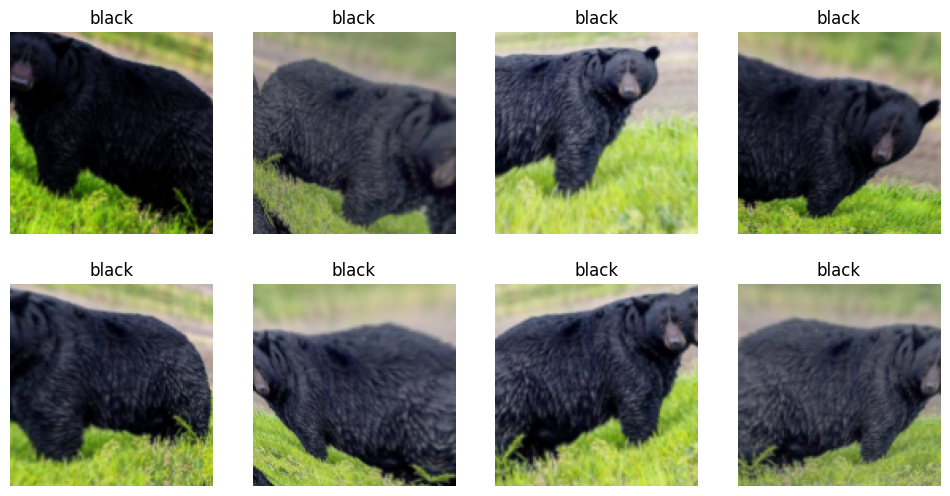

In [79]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

### Final code for the created dataloader

In [80]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

# 2. Train the model
## 1) Create a learner
vision_learner() has a parameter pretrained, which defaults to True. When using a pretrained model, vision_learner will remove the last layer, since that is always specifically customized to the original training task (i.e. ImageNet dataset classification), and replace it with one or more new layers with randomized weights, of an appropriate size for the dataset you are working with. This last part of the model is known as the head.

In [81]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

________________
Comment:
- dls = dataloaders' object, our data
- resnet34 = one of the fastai's build-in models
- metrics = fn provided by fastai that tells you what percentage of images in the validation set are being classified incorrectly.
________________

## 2) Fine-tune the learner
Since we've started with a pretrained model, we use fine_tune instead of the fit() 

In [82]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.397472,0.337977,0.166667,00:02


/Users/hela/Code/fast_ai/.venv/lib/python3.13/site-packages/fastcore/basics.py:868: ResourceWarning: unclosed database in <sqlite3.Connection object at 0x10dd2ce50>
  try: x = tuple(iter(x))
/Users/hela/Code/fast_ai/.venv/lib/python3.13/site-packages/fastcore/basics.py:868: ResourceWarning: unclosed database in <sqlite3.Connection object at 0x171e2b970>
  try: x = tuple(iter(x))


epoch,train_loss,valid_loss,error_rate,time
0,0.352607,0.058770,0.018519,00:02
1,0.247936,0.034441,0.000000,00:02
2,0.189976,0.033520,0.018519,00:02
3,0.159868,0.042883,0.018519,00:02


## 3) Create a confusion matrix
The rows represent all the black, grizzly, and teddy bears in our dataset, respectively. The columns represent the images which the model predicted as black, grizzly, and teddy bears, respectively. Therefore, the diagonal of the matrix shows the images which were classified correctly, and the off-diagonal cells represent those which were classified incorrectly. This is one of the many ways that fastai allows you to view the results of your model. It is (of course!) calculated using the validation set. With the color-coding, the goal is to have white everywhere except the diagonal, where we want dark blue. 

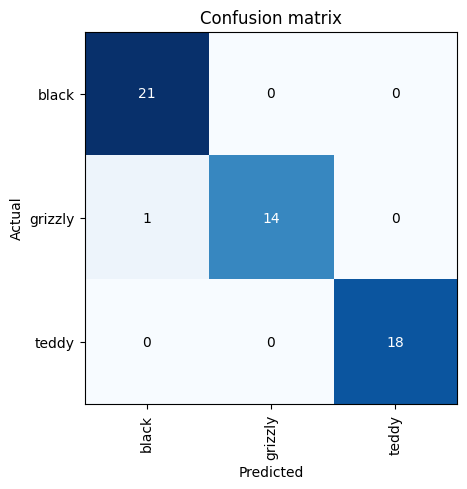

In [83]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

## 4) Sort images by their loss
It's helpful to see where exactly our errors are occurring, to see whether they're due to a dataset problem (e.g., images that aren't bears at all, or are labeled incorrectly, etc.), or a model problem (perhaps it isn't handling images taken with unusual lighting, or from a different angle, etc.).  
The loss is a number that is higher if the model is incorrect (especially if it's also confident of its incorrect answer), or if it's correct, but not confident of its correct answer.  
plot_top_losses shows us the images with the highest loss in our dataset. As the title of the output says, each image is labeled with four things: prediction, actual (target label), loss, and probability. The probability here is the confidence level, from zero to one, that the model has assigned to its prediction:

/Users/hela/Code/fast_ai/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)
/Users/hela/Code/fast_ai/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)
/Users/hela/Code/fast_ai/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't 

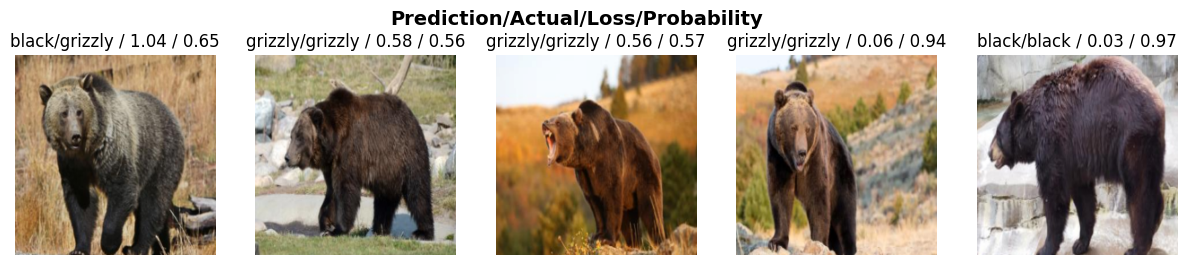

In [84]:
interp.plot_top_losses(5, nrows=1)

# 3. Clean the dataset from wrong data
Sometime the output might show that the image with the highest loss is one that has been predicted correctly and actually labeled wrong. The intuitive approach to doing data cleaning is to do it before you train a model. But as you've seen in this case, a model can actually help you find data issues more quickly and easily. So, we normally prefer to train a quick and simple model first, and then use it to help us with data cleaning.  
fastai includes a handy GUI for data cleaning called ImageClassifierCleaner that allows you to choose a category and the training versus validation set and view the highest-loss images (in order), along with menus to allow images to be selected for removal or relabeling:

In [89]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/popen_fork.py:67: DeprecationWarning: This process (pid=36806) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/popen_fork.py:67: DeprecationWarning: This process (pid=36806) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/popen_fork.py:67: DeprecationWarning: This process (pid=36806) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/popen_fork.py:67: DeprecationWarning: This process (pid=36806) is multi-threaded, u

ImageClassifierCleaner doesn't actually do the deleting or changing of labels for you, it just returns the indices of items to change.  
So, we would run:

In [92]:
# to delete (unlink) all images selected for deletion:
for idx in cleaner.delete():
    cleaner.fns[idx].unlink()

# to move images for which we've selected a different category:
for idx,cat in cleaner.change():
    shutil.move(str(cleaner.fns[idx]), path/cat)

# 4. Turning model into an online app

## 1) Using the model for inference
### 1) Save architecture and trained parameters
Once you've got a model you're happy with, you need to save it, so that you can then copy it over to a server where you'll use it in production.  
Remember that a model consists of two parts: the architecture and the trained parameters.  
The easiest way to save the model is to save both of these, because that way when you load a model you can be sure that you have the matching architecture and parameters.  


To save both parts, use the export method. This method even saves the definition of how to create your DataLoaders. This is important, because otherwise you would have to redefine how to transform your data in order to use your model in production. fastai automatically uses your validation set DataLoader for inference by default, so your data augmentation will not be applied, which is generally what you want.

In [95]:
# fastai saves a file called "export.pkl"
learn.export()

# check that the file exists:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

### 2) Create inference learner

In [97]:
# create inference learner from the exported file
learn_inf = load_learner(path/'export.pkl')

/Users/hela/Code/fast_ai/.venv/lib/python3.13/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


### 3) Try one image prediction as an example
This has returned three things: the predicted category in the same format you originally provided (in this case that's a string), the index of the predicted category, and the probabilities of each category. 

In [101]:
# pass a filename to to get predictions for one image (as it will be during inference)
learn_inf.predict('/Users/hela/Code/fast_ai/bears/grizzly/3aba91da-baa1-4a60-b0fa-bb149b137913.jpg')

('grizzly', tensor(1), tensor([1.8088e-06, 1.0000e+00, 5.9897e-07]))

The last two are based on the order of categories in the vocab of the DataLoaders; that is, the stored list of all possible categories. At inference time, you can access the DataLoaders as an attribute of the Learner:

In [102]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

## 2) Create an app within Notebook

In [125]:
import ipywidgets as widgets  # For FileUpload widget
from fastai.vision.all import PILImage
import io

### 1) Create an upload widget

Create by button:

In [145]:
# Create a FileUpload widget restricted to image files
btn_upload = widgets.FileUpload(accept='.jpg,.jpeg,.png', multiple=False)
# Display the widget (user uploads an image)
display(btn_upload)

FileUpload(value=(), accept='.jpg,.jpeg,.png', description='Upload')

Or create just a link

In [146]:
btn_upload = SimpleNamespace(data = ['/Users/hela/Code/fast_ai/bears/grizzly/3aba91da-baa1-4a60-b0fa-bb149b137913.jpg'])

Save an uploaded image as a var:

In [150]:
img = PILImage.create(btn_upload.data[-1])

### 2) Create an output widget

In [148]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

### 3) Create a prediction widget
Get a prediction:

In [149]:
pred,pred_idx,probs = learn_inf.predict(img)

Display prediction:

In [151]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 1.0000')

### 4) Create a classify button

In [161]:
btn_run = widgets.Button(description='Classify')

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred};, Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

btn_run

Button(description='Classify', style=ButtonStyle())

### 5) Create Vbox

In [162]:
btn_upload = widgets.FileUpload()

VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])